Ross Clark - 15/11/2022

# Example Dashboard

## Stackplots
Stackplots draw multiple datasets as vertically stacked areas. This is useful when the individual data values and additionally their cumulative value are of interest.

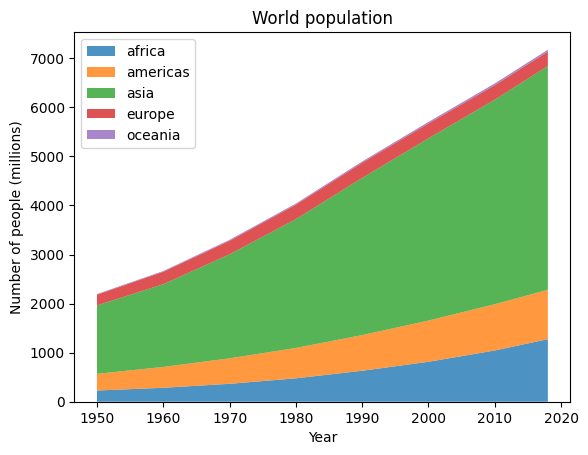

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}

fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

## Bar chart within pie chart
This makes a 'bar of pie' chart where the first slice of the pie is broken down with a bar chart.

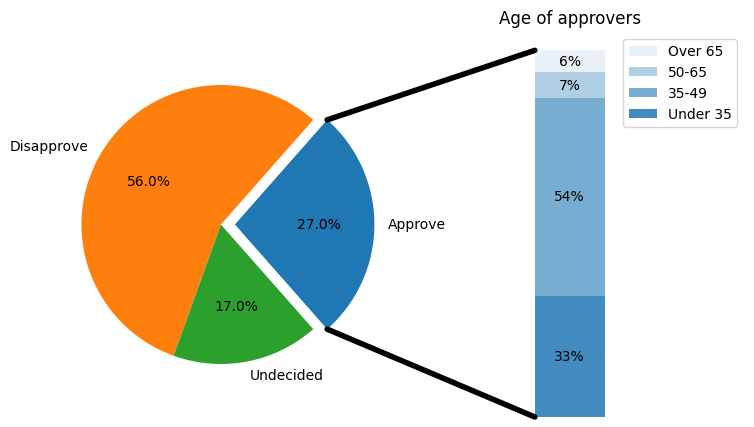

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

## Integral as the area under a curve
This shows a line plot, creates a shaded region to represent the integral between a and b. 


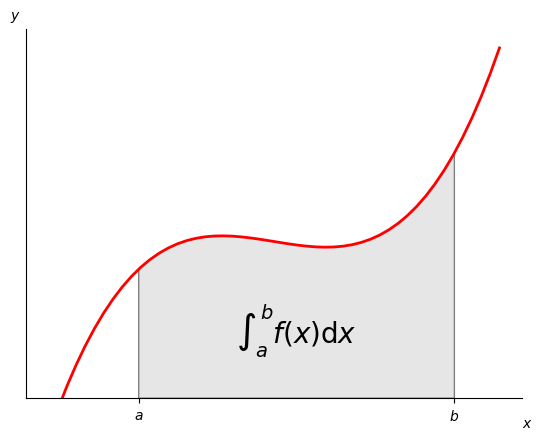

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])

plt.show()